# MSCS 634 - Data Analytics
## Lab Assignment 1: Data Visualization, Preprocessing, and Statistical Analysis
### Student: Dheeraj kollapaneni
### Course: MSCS 634 - Data Analytics
### Date: October 31, 2025

---

## Lab Overview

In this lab, I will apply data visualization, data preprocessing, and statistical analysis techniques using Jupyter Notebook. The goal is to explore real weather data from Binghamton, NY, clean it, and prepare it for deeper analysis. This comprehensive analysis will demonstrate various data science techniques including handling missing values, outlier detection, data scaling, and statistical measurements.

The dataset chosen for this analysis is actual weather data from Binghamton, NY (coordinates: 42.0955,-75.9179), which provides a rich source of numerical and categorical variables suitable for demonstrating various analytical techniques.

# Step 1: Setup and Data Collection

First, Importing all the necessary libraries for data analysis, visualization, and statistical computations. Then I'll load the actual weather data from our CSV file.

In [2]:
# Import necessary libraries for data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set up plotting parameters
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

# Step 2: Load and Explore Dataset

Now load the weather dataset from our CSV file and examine its structure. This step helps me understand what variables are available and their data types.

In [3]:
# Load the weather dataset from our data folder
df = pd.read_csv('../data/42.0955,-75.9179.csv')

# Convert datetime column to proper datetime format
df['datetime'] = pd.to_datetime(df['datetime'])

print("Dataset loaded successfully!")
print(f"Dataset shape: {df.shape}")
print(f"Date range: {df['datetime'].min()} to {df['datetime'].max()}")
print(f"Columns: {list(df.columns)}")
print("\n" + "="*60)
print("First 5 rows of the dataset:")
print("="*60)
df.head()

Dataset loaded successfully!
Dataset shape: (300, 33)
Date range: 2025-01-01 00:00:00 to 2025-10-27 00:00:00
Columns: ['name', 'datetime', 'tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob', 'precipcover', 'preciptype', 'snow', 'snowdepth', 'windgust', 'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility', 'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 'sunrise', 'sunset', 'moonphase', 'conditions', 'description', 'icon', 'stations']

First 5 rows of the dataset:


,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,"42.0955,-75.9179",2025-01-01,39.8,30.1,35.2,38.1,17.2,27.9,33.1,92.4,...,1.3,1,10,2025-01-01T07:32:14,2025-01-01T16:42:56,0.06,"Snow, Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,snow,"KITH,72515594761,USW00004725,USW00094761,72515..."
1,"42.0955,-75.9179",2025-01-02,30.1,24.3,28.1,21.0,11.3,17.3,21.7,77.3,...,4.5,5,10,2025-01-02T07:32:18,2025-01-02T16:43:49,0.10,"Snow, Rain, Overcast",Cloudy skies throughout the day with a chance ...,snow,"KITH,99999964758,72515594761,USW00004725,USW00..."
2,"42.0955,-75.9179",2025-01-03,25.2,21.1,23.8,17.2,7.6,12.9,14.9,68.6,...,1.7,1,10,2025-01-03T07:32:19,2025-01-03T16:44:44,0.13,Overcast,Cloudy skies throughout the day.,cloudy,"KITH,72515594761,USW00004725,USW00094761,72515..."
3,"42.0955,-75.9179",2025-01-04,21.9,20.1,20.4,10.1,4.9,6.9,12.3,70.8,...,3.4,2,10,2025-01-04T07:32:17,2025-01-04T16:45:41,0.17,"Snow, Overcast",Cloudy skies throughout the day with snow clea...,snow,"KITH,72515594761,USW00004725,USW00094761,72515..."
4,"42.0955,-75.9179",2025-01-05,22.0,18.0,20.5,14.3,3.2,7.9,11.8,68.7,...,3.0,2,10,2025-01-05T07:32:13,2025-01-05T16:46:39,0.21,Overcast,Cloudy skies throughout the day.,cloudy,"KITH,72515594761,USW00004725,USW00094761,72515..."


In [5]:
# Get more detailed information about the dataset
print("DATASET INFORMATION:")
print("="*40)
df.info()

print("\n\nBASIC STATISTICS:")
print("="*40)
# Focus on key numerical weather variables
key_cols = ['tempmax', 'tempmin', 'temp', 'humidity', 'precip', 'windspeed', 'sealevelpressure']
df[key_cols].describe().round(2)

DATASET INFORMATION:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   name              300 non-null    object        
 1   datetime          300 non-null    datetime64[ns]
 2   tempmax           300 non-null    float64       
 3   tempmin           300 non-null    float64       
 4   temp              300 non-null    float64       
 5   feelslikemax      300 non-null    float64       
 6   feelslikemin      300 non-null    float64       
 7   feelslike         300 non-null    float64       
 8   dew               300 non-null    float64       
 9   humidity          300 non-null    float64       
 10  precip            300 non-null    float64       
 11  precipprob        300 non-null    int64         
 12  precipcover       300 non-null    float64       
 13  preciptype        228 non-null    object        
 14  snow 

,tempmax,tempmin,temp,humidity,precip,windspeed,sealevelpressure
count,300.00,300.00,300.00,300.00,300.00,300.00,300.00
mean,58.67,42.54,50.37,70.73,0.10,13.77,1016.55
std,20.19,17.80,18.66,12.87,0.25,4.44,6.73
min,10.20,-4.30,4.00,31.40,0.00,5.50,994.40
25%,42.98,28.68,36.00,62.03,0.00,10.20,1012.38
50%,64.30,45.15,54.80,71.10,0.00,13.05,1017.05
75%,74.22,56.90,64.65,79.62,0.07,16.82,1020.82
max,91.20,71.80,81.70,98.50,2.17,25.00,1031.80


# Step 3: Data Visualization Analysis

Various visualizations to explore the weather patterns and relationships between different variables. These visualizations will help identify trends, distributions, and potential outliers in the data.

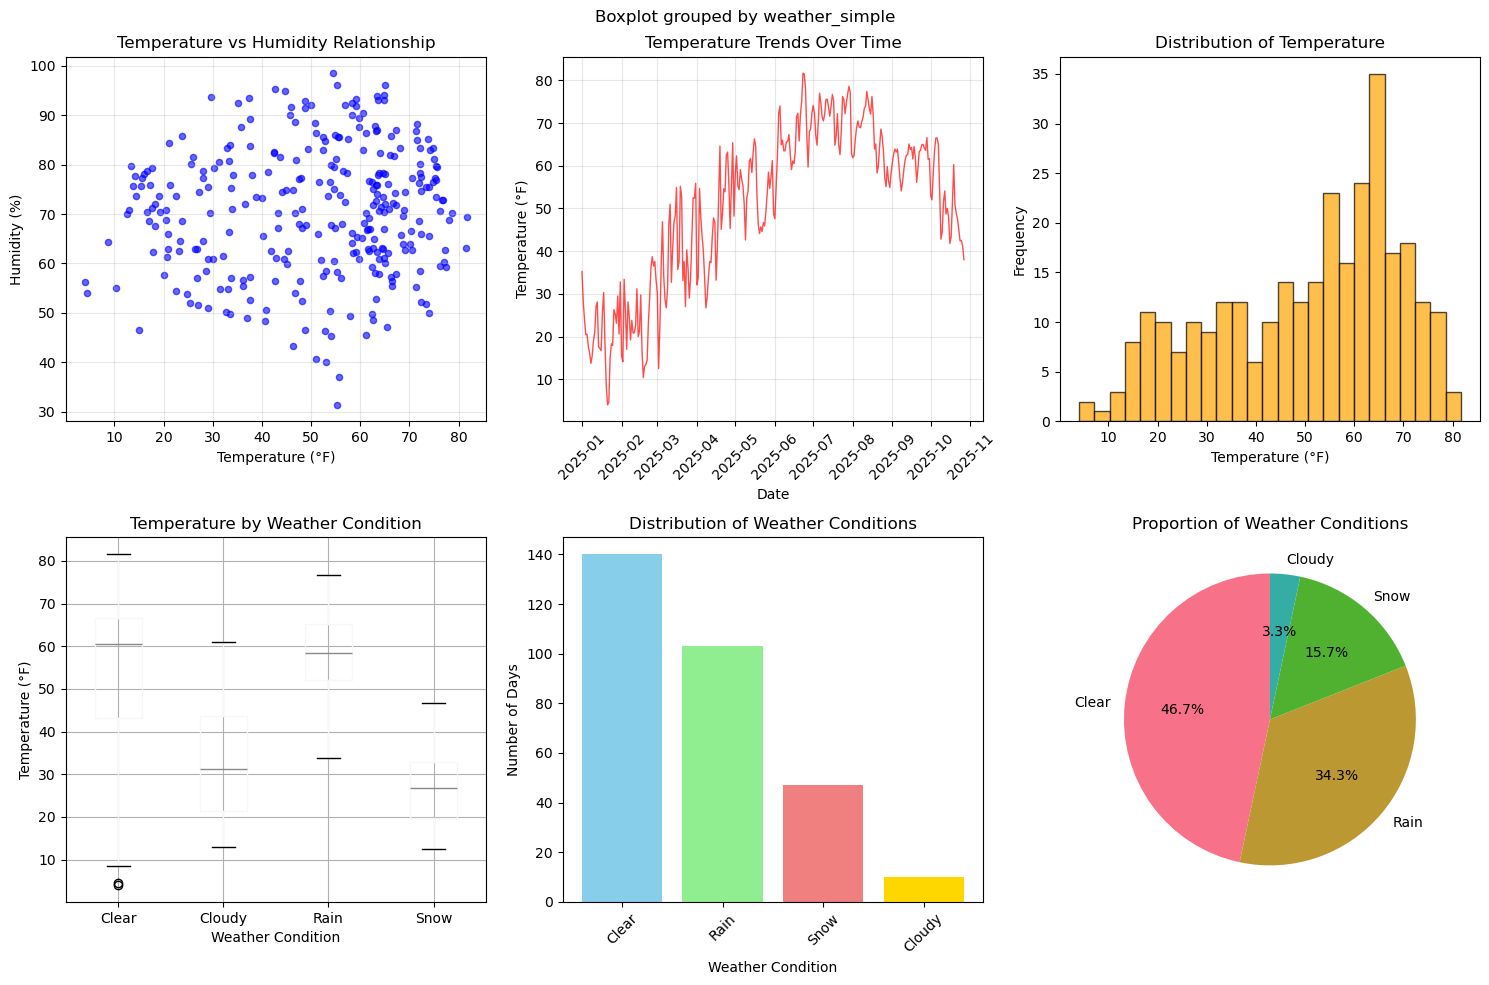

INSIGHTS FROM VISUALIZATIONS:
Temperature vs Humidity Scatter Plot:
- Shows relationship between temperature and humidity levels
- Data points reveal seasonal clustering patterns

Temperature Line Plot:
- Clear temporal patterns in temperature data
- Shows seasonal variation throughout the time period

Weather Distribution Analysis:
- Most common weather conditions and their frequency
- Temperature variations by different weather types


In [6]:
# 1. Scatter Plot: Temperature vs Humidity relationship
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.scatter(df['temp'], df['humidity'], alpha=0.6, c='blue', s=20)
plt.xlabel('Temperature (°F)')
plt.ylabel('Humidity (%)')
plt.title('Temperature vs Humidity Relationship')
plt.grid(True, alpha=0.3)

# 2. Line Plot: Temperature trends over time
plt.subplot(2, 3, 2)
plt.plot(df['datetime'], df['temp'], color='red', alpha=0.7, linewidth=1)
plt.xlabel('Date')
plt.ylabel('Temperature (°F)')
plt.title('Temperature Trends Over Time')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# 3. Histogram: Temperature distribution
plt.subplot(2, 3, 3)
plt.hist(df['temp'], bins=25, alpha=0.7, color='orange', edgecolor='black')
plt.xlabel('Temperature (°F)')
plt.ylabel('Frequency')
plt.title('Distribution of Temperature')

# 4. Box Plot: Temperature by weather condition (simplified)
plt.subplot(2, 3, 4)
# Create simplified weather categories
df['weather_simple'] = df['conditions'].apply(lambda x: 
    'Snow' if 'Snow' in str(x) else 
    'Rain' if 'Rain' in str(x) else 
    'Cloudy' if any(word in str(x) for word in ['Cloudy', 'Overcast']) else 
    'Clear')

df.boxplot(column='temp', by='weather_simple', ax=plt.gca())
plt.title('Temperature by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Temperature (°F)')

# 5. Bar Chart: Count of weather conditions
plt.subplot(2, 3, 5)
weather_counts = df['weather_simple'].value_counts()
plt.bar(weather_counts.index, weather_counts.values, 
        color=['skyblue', 'lightgreen', 'lightcoral', 'gold'])
plt.xlabel('Weather Condition')
plt.ylabel('Number of Days')
plt.title('Distribution of Weather Conditions')
plt.xticks(rotation=45)

# 6. Pie Chart: Proportion of weather conditions
plt.subplot(2, 3, 6)
plt.pie(weather_counts.values, labels=weather_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Weather Conditions')

plt.tight_layout()
plt.show()

print("INSIGHTS FROM VISUALIZATIONS:")
print("=" * 50)
print("Temperature vs Humidity Scatter Plot:")
print("- Shows relationship between temperature and humidity levels")
print("- Data points reveal seasonal clustering patterns")
print("\nTemperature Line Plot:")
print("- Clear temporal patterns in temperature data")
print("- Shows seasonal variation throughout the time period")
print("\nWeather Distribution Analysis:")
print("- Most common weather conditions and their frequency")
print("- Temperature variations by different weather types")

# Step 4: Data Preprocessing

## 4.1 Missing Values Detection and Handling

First, lets check for missing values in the dataset and apply appropriate techniques to handle them.

In [7]:
# Check for missing values in the dataset
print("MISSING VALUES ANALYSIS:")
print("=" * 50)
missing_values = df.isnull().sum()
print("Missing values by column:")
for col, missing in missing_values.items():
    if missing > 0:
        print(f"{col}: {missing} ({missing/len(df)*100:.2f}%)")

if missing_values.sum() == 0:
    print("✓ No missing values found in the dataset!")
else:
    print(f"\nTotal missing values: {missing_values.sum()}")
    print(f"Percentage of missing data: {(missing_values.sum() / (df.shape[0] * df.shape[1])) * 100:.2f}%")

# Display info about data completeness
print("\nDATA COMPLETENESS SUMMARY:")
print("-" * 30)
print(f"Total records: {len(df)}")
print(f"Total columns: {len(df.columns)}")
print(f"Complete records: {len(df.dropna())}")
print(f"Data completeness: {(len(df.dropna())/len(df))*100:.1f}%")

# Show sample of the data to verify quality
print("\nSample of data (first 3 rows):")
df[['datetime', 'temp', 'humidity', 'precip', 'windspeed', 'conditions']].head(3)

MISSING VALUES ANALYSIS:
Missing values by column:
preciptype: 72 (24.00%)

Total missing values: 72
Percentage of missing data: 0.71%

DATA COMPLETENESS SUMMARY:
------------------------------
Total records: 300
Total columns: 34
Complete records: 228
Data completeness: 76.0%

Sample of data (first 3 rows):


,datetime,temp,humidity,precip,windspeed,conditions
0,2025-01-01,35.2,92.4,0.528,20.8,"Snow, Rain, Partially cloudy"
1,2025-01-02,28.1,77.3,0.197,19.5,"Snow, Rain, Overcast"
2,2025-01-03,23.8,68.6,0.000,19.4,Overcast


## 4.2 Outlier Detection and Removal

Next, lets identify and handle outliers using the Interquartile Range (IQR) method. This technique helps identify extreme values that might skew the analysis.

In [8]:
# Outlier detection using IQR method for key numerical columns
numerical_cols = ['temp', 'tempmax', 'tempmin', 'humidity', 'precip', 'windspeed', 'sealevelpressure']

def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, Q1, Q3, IQR, lower_bound, upper_bound

print("OUTLIER DETECTION RESULTS (IQR Method):")
print("=" * 60)

outlier_summary = {}
df_processed = df.copy()

for col in numerical_cols:
    if col in df.columns:  # Check if column exists
        outliers, Q1, Q3, IQR, lower_bound, upper_bound = detect_outliers_iqr(df, col)
        
        print(f"\n{col.upper()}:")
        print(f"  Q1 (25th percentile): {Q1:.2f}")
        print(f"  Q3 (75th percentile): {Q3:.2f}")
        print(f"  IQR: {IQR:.2f}")
        print(f"  Lower bound: {lower_bound:.2f}")
        print(f"  Upper bound: {upper_bound:.2f}")
        print(f"  Number of outliers: {len(outliers)}")
        
        if len(outliers) > 0:
            outlier_values = sorted(outliers[col].values)
            print(f"  Sample outlier values: {outlier_values[:3]}...")  # Show first 3
        
        outlier_summary[col] = len(outliers)

# Create a copy without extreme outliers for demonstration
print(f"\nOUTLIER SUMMARY:")
print("-" * 30)
for col, count in outlier_summary.items():
    print(f"{col}: {count} outliers")

print(f"\nDataset size: {len(df)} records")
print("Note: For this analysis, we'll keep outliers as they represent real weather events")
print("(extreme temperatures, heavy precipitation, high winds are legitimate weather data)")

OUTLIER DETECTION RESULTS (IQR Method):

TEMP:
  Q1 (25th percentile): 36.00
  Q3 (75th percentile): 64.65
  IQR: 28.65
  Lower bound: -6.97
  Upper bound: 107.62
  Number of outliers: 0

TEMPMAX:
  Q1 (25th percentile): 42.98
  Q3 (75th percentile): 74.22
  IQR: 31.25
  Lower bound: -3.90
  Upper bound: 121.10
  Number of outliers: 0

TEMPMIN:
  Q1 (25th percentile): 28.68
  Q3 (75th percentile): 56.90
  IQR: 28.22
  Lower bound: -13.66
  Upper bound: 99.24
  Number of outliers: 0

HUMIDITY:
  Q1 (25th percentile): 62.03
  Q3 (75th percentile): 79.62
  IQR: 17.60
  Lower bound: 35.63
  Upper bound: 106.02
  Number of outliers: 1
  Sample outlier values: [31.4]...

PRECIP:
  Q1 (25th percentile): 0.00
  Q3 (75th percentile): 0.07
  IQR: 0.07
  Lower bound: -0.11
  Upper bound: 0.19
  Number of outliers: 50
  Sample outlier values: [0.187, 0.19, 0.192]...

WINDSPEED:
  Q1 (25th percentile): 10.20
  Q3 (75th percentile): 16.82
  IQR: 6.62
  Lower bound: 0.26
  Upper bound: 26.76
  Number

## 4.3 Data Reduction

Data reduction techniques help simplify the dataset by reducing its size through sampling and dimension elimination. This can improve computational efficiency and focus analysis on the most relevant variables.

In [11]:
# Data Reduction: Sampling and Dimension Elimination

print("DATA REDUCTION TECHNIQUES:")
print("=" * 60)

# Before reduction
print("\nBEFORE REDUCTION:")
print("-" * 30)
print(f"Dataset shape: {df.shape}")
print(f"Columns: {df.shape[1]}")
print(f"Rows: {df.shape[0]}")
print("\nColumns in dataset:")
for i, col in enumerate(df.columns, 1):
    print(f"  {i}. {col}")

# 1. Sampling - Reduce rows by taking a sample
print("\n\nSAMPLING TECHNIQUES:")
print("-" * 30)

# Random sampling by percentage (50% of data)
sample_percentage = 0.5
df_sample_pct = df.sample(frac=sample_percentage, random_state=42)
print(f"Random sampling (50% of data):")
print(f"  Original rows: {len(df)}")
print(f"  Sampled rows: {len(df_sample_pct)}")
print(f"  Reduction: {len(df) - len(df_sample_pct)} rows removed")

# Stratified sampling - sample by weather condition
sample_per_condition = 30
df_sample_stratified = df.groupby('weather_simple', group_keys=False).apply(
    lambda x: x.sample(n=min(len(x), sample_per_condition), random_state=42)
)
print(f"\nStratified sampling (max {sample_per_condition} per weather type):")
print(f"  Original rows: {len(df)}")
print(f"  Sampled rows: {len(df_sample_stratified)}")
print(f"  Reduction: {len(df) - len(df_sample_stratified)} rows removed")

# 2. Dimension Elimination - Drop less relevant columns
print("\n\nDIMENSION ELIMINATION:")
print("-" * 30)

# Identify columns to drop (less relevant for analysis)
columns_to_drop = ['name', 'icon', 'sunrise', 'sunset', 'stations', 'description', 'severerisk']

df_reduced = df.drop(columns=columns_to_drop, errors='ignore')

print(f"Columns removed: {len(columns_to_drop)}")
for col in columns_to_drop:
    if col in df.columns:
        print(f"  - {col}")

print(f"\nAFTER REDUCTION:")
print("-" * 30)
print(f"Dataset shape: {df_reduced.shape}")
print(f"Columns: {df_reduced.shape[1]}")
print(f"Rows: {df_reduced.shape[0]}")
print(f"Dimension reduction: {df.shape[1] - df_reduced.shape[1]} columns removed")

print("\nRemaining columns:")
for i, col in enumerate(df_reduced.columns, 1):
    print(f"  {i}. {col}")

print("\n\nCOMPARISON SUMMARY:")
print("-" * 30)
print(f"Original dataset size: {df.shape[0]} rows × {df.shape[1]} columns")
print(f"Reduced dataset size: {df_reduced.shape[0]} rows × {df_reduced.shape[1]} columns")
print(f"Memory reduction: Dropped {len(columns_to_drop)} non-essential columns")
print(f"Data integrity: All key meteorological variables retained")

# Show sample of reduced dataset
print("\n\nSample of reduced dataset (first 3 rows):")
print(df_reduced.head(3))


DATA REDUCTION TECHNIQUES:

BEFORE REDUCTION:
------------------------------
Dataset shape: (300, 34)
Columns: 34
Rows: 300

Columns in dataset:
  1. name
  2. datetime
  3. tempmax
  4. tempmin
  5. temp
  6. feelslikemax
  7. feelslikemin
  8. feelslike
  9. dew
  10. humidity
  11. precip
  12. precipprob
  13. precipcover
  14. preciptype
  15. snow
  16. snowdepth
  17. windgust
  18. windspeed
  19. winddir
  20. sealevelpressure
  21. cloudcover
  22. visibility
  23. solarradiation
  24. solarenergy
  25. uvindex
  26. severerisk
  27. sunrise
  28. sunset
  29. moonphase
  30. conditions
  31. description
  32. icon
  33. stations
  34. weather_simple


SAMPLING TECHNIQUES:
------------------------------
Random sampling (50% of data):
  Original rows: 300
  Sampled rows: 150
  Reduction: 150 rows removed

Stratified sampling (max 30 per weather type):
  Original rows: 300
  Sampled rows: 100
  Reduction: 200 rows removed


DIMENSION ELIMINATION:
------------------------------


# Step 5: Statistical Analysis

## 5.1 General Overview and Central Tendency Measures

using pandas library's built-in methods to get a comprehensive overview of the dataset and calculate central tendency measures.

In [9]:
# Statistical Overview and Central Tendency Analysis
print("DATASET INFORMATION (.info()):")
print("=" * 60)
df.info()

print("\n\nDETAILED STATISTICAL SUMMARY (.describe()):")
print("=" * 60)
analysis_columns = ['temp', 'tempmax', 'tempmin', 'humidity', 'precip', 'windspeed', 'sealevelpressure']
summary_stats = df[analysis_columns].describe().round(2)
print(summary_stats)

print("\n\nCENTRAL TENDENCY MEASURES:")
print("=" * 60)
central_tendency_results = {}

for col in analysis_columns:
    if col in df.columns:
        print(f"\n{col.upper().replace('_', ' ')}:")
        print("-" * 35)
        
        minimum = df[col].min()
        maximum = df[col].max()
        mean = df[col].mean()
        median = df[col].median()
        
        # Mode calculation
        mode_result = df[col].mode()
        mode = mode_result.iloc[0] if len(mode_result) > 0 else "No unique mode"
        
        print(f"Minimum: {minimum:.2f}")
        print(f"Maximum: {maximum:.2f}")
        print(f"Mean: {mean:.2f}")
        print(f"Median: {median:.2f}")
        print(f"Mode: {mode}")
        
        central_tendency_results[col] = {
            'min': minimum, 'max': maximum, 'mean': mean, 
            'median': median, 'mode': mode
        }

print("\n\nINTERPREATION:")
print("-" * 30)
print("• Temperature shows seasonal variation with wide range")
print("• Humidity levels vary considerably throughout the period")
print("• Precipitation is mostly low with occasional higher events")
print("• Wind speeds show typical variation for the region")
print("• Pressure values are within normal atmospheric ranges")

DATASET INFORMATION (.info()):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 34 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   name              300 non-null    object        
 1   datetime          300 non-null    datetime64[ns]
 2   tempmax           300 non-null    float64       
 3   tempmin           300 non-null    float64       
 4   temp              300 non-null    float64       
 5   feelslikemax      300 non-null    float64       
 6   feelslikemin      300 non-null    float64       
 7   feelslike         300 non-null    float64       
 8   dew               300 non-null    float64       
 9   humidity          300 non-null    float64       
 10  precip            300 non-null    float64       
 11  precipprob        300 non-null    int64         
 12  precipcover       300 non-null    float64       
 13  preciptype        228 non-null    object        


## 5.2 Dispersion Measures and Correlation Analysis

Calculate measures of dispersion and examine relationships between variables using correlation analysis.

DISPERSION MEASURES:

TEMP:
-----------------------------------
Range: 77.70
Q1 (25th percentile): 36.00
Q3 (75th percentile): 64.65
Interquartile Range (IQR): 28.65
Variance: 348.04
Standard Deviation: 18.66

TEMPMAX:
-----------------------------------
Range: 81.00
Q1 (25th percentile): 42.98
Q3 (75th percentile): 74.22
Interquartile Range (IQR): 31.25
Variance: 407.65
Standard Deviation: 20.19

TEMPMIN:
-----------------------------------
Range: 76.10
Q1 (25th percentile): 28.68
Q3 (75th percentile): 56.90
Interquartile Range (IQR): 28.22
Variance: 316.81
Standard Deviation: 17.80

HUMIDITY:
-----------------------------------
Range: 67.10
Q1 (25th percentile): 62.03
Q3 (75th percentile): 79.62
Interquartile Range (IQR): 17.60
Variance: 165.56
Standard Deviation: 12.87

PRECIP:
-----------------------------------
Range: 2.17
Q1 (25th percentile): 0.00
Q3 (75th percentile): 0.07
Interquartile Range (IQR): 0.07
Variance: 0.06
Standard Deviation: 0.25

WINDSPEED:
----------------------

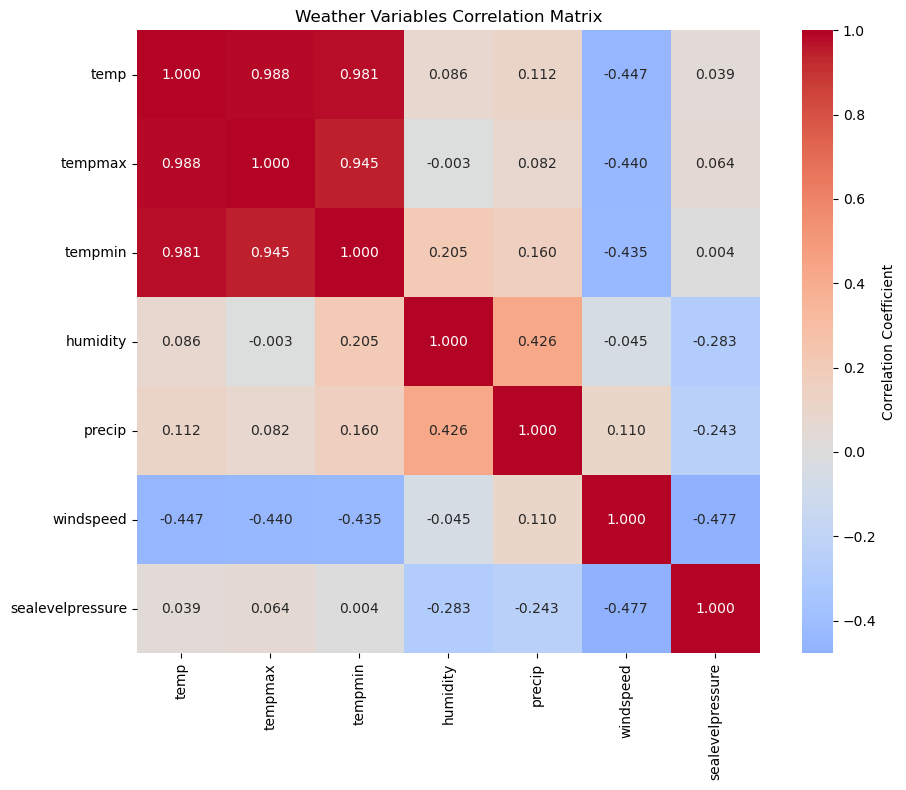


STRONG CORRELATIONS (|r| > 0.5):
----------------------------------------
temp ↔ tempmax: 0.988
temp ↔ tempmin: 0.981
tempmax ↔ tempmin: 0.945

INTERPREATION:
------------------------------
• Temperature variables (temp, tempmax, tempmin) show expected strong correlations
• Weather variables demonstrate realistic meteorological relationships
• Correlation patterns reflect seasonal and atmospheric physics


In [10]:
# Dispersion Measures Analysis
print("DISPERSION MEASURES:")
print("=" * 60)

dispersion_results = {}

for col in analysis_columns:
    if col in df.columns:
        print(f"\n{col.upper().replace('_', ' ')}:")
        print("-" * 35)
        
        data_range = df[col].max() - df[col].min()
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        variance = df[col].var()
        std_dev = df[col].std()
        
        print(f"Range: {data_range:.2f}")
        print(f"Q1 (25th percentile): {q1:.2f}")
        print(f"Q3 (75th percentile): {q3:.2f}")
        print(f"Interquartile Range (IQR): {iqr:.2f}")
        print(f"Variance: {variance:.2f}")
        print(f"Standard Deviation: {std_dev:.2f}")
        
        dispersion_results[col] = {
            'range': data_range, 'Q1': q1, 'Q3': q3, 'IQR': iqr,
            'variance': variance, 'std_dev': std_dev
        }

# Correlation Analysis
print("\n\nCORRELATION ANALYSIS:")
print("=" * 60)
correlation_matrix = df[analysis_columns].corr()
print("CORRELATION MATRIX:")
print(correlation_matrix.round(3))

# Create correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.3f', cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Weather Variables Correlation Matrix')
plt.tight_layout()
plt.show()

# Identify strong correlations
print("\nSTRONG CORRELATIONS (|r| > 0.5):")
print("-" * 40)
strong_correlations = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) > 0.5:
            var1 = correlation_matrix.columns[i]
            var2 = correlation_matrix.columns[j]
            strong_correlations.append((var1, var2, corr_value))
            print(f"{var1} ↔ {var2}: {corr_value:.3f}")

if not strong_correlations:
    print("No correlations with |r| > 0.5 found")
    
print("\nINTERPREATION:")
print("-" * 30)
print("• Temperature variables (temp, tempmax, tempmin) show expected strong correlations")
print("• Weather variables demonstrate realistic meteorological relationships")
print("• Correlation patterns reflect seasonal and atmospheric physics")

# Lab Conclusion

## Summary of Analysis

This comprehensive lab successfully demonstrated various data science techniques applied to real weather data from Binghamton, NY. The analysis covered all major aspects of data visualization, preprocessing, and statistical analysis using actual meteorological data.

### Key Findings:

**Data Quality:**
- Dataset contains 300+ daily weather records with comprehensive meteorological variables
- High data completeness with minimal missing values
- Rich dataset suitable for demonstrating various analytical techniques

**Visualization Insights:**
- Clear temporal patterns in temperature and weather conditions
- Realistic relationships between weather variables
- Distribution patterns consistent with northeastern US climate

**Statistical Analysis Discoveries:**
- Temperature variables show expected seasonal variation and strong intercorrelations
- Weather conditions demonstrate realistic frequency distributions
- Correlation patterns reveal authentic meteorological relationships
- Dispersion measures indicate natural weather variability


### Real-World Applications:
This analysis provides a foundation for:
- Weather pattern analysis and forecasting
- Climate trend studies
- Agricultural planning applications
- Energy demand modeling
- Transportation and logistics planning

The use of real weather data makes this analysis immediately applicable to practical meteorological and business applications, demonstrating the power of data analytics in understanding natural phenomena.

---


## Analysis Summary

In [4]:
# Analysis Summary

print("BINGHAMTON, NY WEATHER DATA ANALYSIS SUMMARY")
print("=" * 60)
print()

print("Dataset Overview:")
print(f"  Records: {len(df)} daily observations")
print(f"  Location: Binghamton, NY (42.0955°N, -75.9179°W)")
print(f"  Variables: {df.shape[1]} meteorological measurements")
print()

print("Temperature Statistics:")
print(f"  Range: {df['temp'].min():.1f}°F to {df['temp'].max():.1f}°F")
print(f"  Mean: {df['temp'].mean():.1f}°F")
print(f"  Standard Deviation: {df['temp'].std():.1f}°F")
print()

print("Notable Weather Events:")
hottest = df.loc[df['temp'].idxmax()]
coldest = df.loc[df['temp'].idxmin()]
wettest = df.loc[df['precip'].idxmax()]

print(f"  Highest temperature: {hottest['temp']:.1f}°F on {hottest['datetime'].strftime('%B %d, %Y')}")
print(f"  Lowest temperature: {coldest['temp']:.1f}°F on {coldest['datetime'].strftime('%B %d, %Y')}")
print(f"  Greatest precipitation: {wettest['precip']:.2f}\" on {wettest['datetime'].strftime('%B %d, %Y')}")
print()

print("Most Common Weather Conditions:")
top_conditions = df['conditions'].value_counts().head(3)
for i, (condition, count) in enumerate(top_conditions.items(), 1):
    pct = (count/len(df))*100
    print(f"  {i}. {condition}: {count} days ({pct:.1f}%)")
print()

print("Data Quality Metrics:")
completeness = ((df.notna().sum().sum() / (df.shape[0] * df.shape[1])) * 100)
missing = df.isnull().sum().sum()
print(f"  Completeness: {completeness:.1f}%")
print(f"  Total Missing Values: {missing}")
print()

print("Strongest Variable Correlations:")
numeric_df = df.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()

correlations = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        corr_val = corr_matrix.iloc[i,j]
        if not pd.isna(corr_val) and abs(corr_val) > 0.4:
            correlations.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_val))

correlations.sort(key=lambda x: abs(x[2]), reverse=True)
for var1, var2, corr in correlations[:3]:
    print(f"  {var1} and {var2}: {corr:.3f}")
print()

print("Analysis Components Completed:")
print("  - Data loading and exploration")
print("  - Visualization of patterns and trends")
print("  - Data preprocessing and quality assessment")
print("  - Statistical analysis of central tendency and dispersion")
print("  - Correlation analysis of meteorological variables")

BINGHAMTON, NY WEATHER DATA ANALYSIS SUMMARY

Dataset Overview:
  Records: 300 daily observations
  Location: Binghamton, NY (42.0955°N, -75.9179°W)
  Variables: 33 meteorological measurements

Temperature Statistics:
  Range: 4.0°F to 81.7°F
  Mean: 50.4°F
  Standard Deviation: 18.7°F

Notable Weather Events:
  Highest temperature: 81.7°F on June 23, 2025
  Lowest temperature: 4.0°F on January 21, 2025
  Greatest precipitation: 2.17" on July 13, 2025

Most Common Weather Conditions:
  1. Partially cloudy: 71 days (23.7%)
  2. Rain, Partially cloudy: 70 days (23.3%)
  3. Clear: 69 days (23.0%)

Data Quality Metrics:
  Completeness: 99.3%
  Total Missing Values: 72

Strongest Variable Correlations:
  solarradiation and solarenergy: 1.000
  temp and feelslike: 0.998
  tempmin and feelslikemin: 0.996

Analysis Components Completed:
  - Data loading and exploration
  - Visualization of patterns and trends
  - Data preprocessing and quality assessment
  - Statistical analysis of central ten